#### ASSIGNMENT 1: Learning to train a neural network with Iris-dataset

Our goal is to learn to build and train a neural network.

We first import all required libraries numpy, matplotlib, pandas,tensorflow and keras.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras as K
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.utils import to_categorical

After we have imported the the libraries, we need to import the dataset, split it according to sepal and petal length and width after which we preview it.

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)
print(dataset.head())
print(dataset.shape)

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


Now it's time to pre-process the dataset. First we drop shuffle the order of the rows in the dataset and create new index. 

In [6]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

dataset['class'] = pd.Categorical(dataset['class']).codes

X = pd.DataFrame(dataset.drop(['class'], axis=1))
y = to_categorical(dataset['class'])

print(X.head())
print(y[:5])

   sepal-length  sepal-width  petal-length  petal-width
0           6.3          2.9           5.6          1.8
1           5.9          3.0           4.2          1.5
2           6.9          3.1           5.1          2.3
3           4.8          3.0           1.4          0.1
4           7.4          2.8           6.1          1.9
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [24]:
model = Sequential([
    Input(shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

optimizer = K.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=500, batch_size=8, verbose=1, shuffle=True, validation_split=0.2)

Epoch 1/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3339 - loss: 2.2041 - val_accuracy: 0.3000 - val_loss: 2.2613
Epoch 2/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3399 - loss: 2.1262 - val_accuracy: 0.3000 - val_loss: 2.1652
Epoch 3/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3780 - loss: 1.9747 - val_accuracy: 0.3000 - val_loss: 2.0725
Epoch 4/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2946 - loss: 2.0889 - val_accuracy: 0.3000 - val_loss: 1.9809
Epoch 5/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4011 - loss: 1.7035 - val_accuracy: 0.3000 - val_loss: 1.8981
Epoch 6/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3358 - loss: 1.7456 - val_accuracy: 0.3000 - val_loss: 1.8125
Epoch 7/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3654 - loss: 1.6893 - val_accuracy: 0.3000 - val_loss: 1.7318
Epoch 8/500
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3366 - loss: 1.6465 - val_accuracy: 0.3000 - 

In [13]:
test_loss, test_acc = model.evaluate(X, y, verbose=2)
print('\nTest accuracy:', test_acc)

5/5 - 0s - 27ms/step - accuracy: 0.9800 - loss: 0.1391

Test accuracy: 0.9800000190734863


In [17]:
model.summary()
X.shape

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136 (548.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69 (280.00 B)

(150, 4)

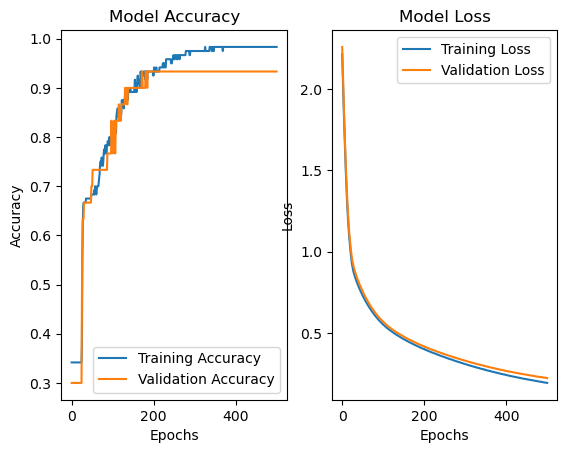

In [27]:
history = model.history.history

plt.Figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()